Crypto price predictor
======================

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
doge_data = pd.read_csv('crypto/coin_Dogecoin.csv')

In [3]:
doge_data.info()
doge_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2760 non-null   int64  
 1   Name       2760 non-null   object 
 2   Symbol     2760 non-null   object 
 3   Date       2760 non-null   object 
 4   High       2760 non-null   float64
 5   Low        2760 non-null   float64
 6   Open       2760 non-null   float64
 7   Close      2760 non-null   float64
 8   Volume     2760 non-null   float64
 9   Marketcap  2760 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 215.8+ KB


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [4]:
doge_data.drop(['SNo', 'Name', 'Symbol'],axis=1,inplace=True) 
doge_data.head()

,Date,High,Low,Open,Close,Volume,Marketcap
0,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


axis=0 (Rows) → "Index Axis"
axis=1 (Columns) → "Column Axis"

In [5]:
doge_data['timestamp'] = pd.to_datetime(doge_data['Date']).apply(lambda x : x.timestamp())
doge_data.head()

,Date,High,Low,Open,Close,Volume,Marketcap,timestamp
0,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06,1.387238e+09
1,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06,1.387325e+09
2,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06,1.387411e+09
3,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07,1.387498e+09
4,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06,1.387584e+09


In [6]:
doge_data.drop(['Date'], axis=1, inplace=True)
doge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2760 non-null   float64
 1   Low        2760 non-null   float64
 2   Open       2760 non-null   float64
 3   Close      2760 non-null   float64
 4   Volume     2760 non-null   float64
 5   Marketcap  2760 non-null   float64
 6   timestamp  2760 non-null   float64
dtypes: float64(7)
memory usage: 151.1 KB


In [7]:
doge_data.corr()

,High,Low,Open,Close,Volume,Marketcap,timestamp
High,1.000000,0.983996,0.992309,0.993554,0.726273,0.993496,0.331338
Low,0.983996,1.000000,0.991880,0.993411,0.640496,0.993519,0.339448
Open,0.992309,0.991880,1.000000,0.989208,0.665606,0.989258,0.334542
Close,0.993554,0.993411,0.989208,1.000000,0.704855,0.999991,0.335719
Volume,0.726273,0.640496,0.665606,0.704855,1.000000,0.703837,0.245079
Marketcap,0.993496,0.993519,0.989258,0.999991,0.703837,1.000000,0.335493
timestamp,0.331338,0.339448,0.334542,0.335719,0.245079,0.335493,1.000000


In [8]:
doge_prices = pd.DataFrame({'day_1': doge_data[['High', 'Low']].mean(axis=1)})
doge_prices.head()

,day_1
0,0.000508
1,0.000202
2,0.000283
3,0.000924
4,0.000902


In [9]:
doge_prices["day_2"] = doge_prices["day_1"].shift(-1)
doge_prices["day_3"] = doge_prices["day_1"].shift(-2)
doge_prices["day_4"] = doge_prices["day_1"].shift(-3)
doge_prices.head()

,day_1,day_2,day_3,day_4
0,0.000508,0.000202,0.000283,0.000924
1,0.000202,0.000283,0.000924,0.000902
2,0.000283,0.000924,0.000902,0.000527
3,0.000924,0.000902,0.000527,0.000389
4,0.000902,0.000527,0.000389,0.000377


In [10]:
doge_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day_1   2760 non-null   float64
 1   day_2   2759 non-null   float64
 2   day_3   2758 non-null   float64
 3   day_4   2757 non-null   float64
dtypes: float64(4)
memory usage: 86.4 KB


In [11]:
doge_prices.tail()

,day_1,day_2,day_3,day_4
2755,0.243423,0.246334,0.247996,0.237129
2756,0.246334,0.247996,0.237129,0.235876
2757,0.247996,0.237129,0.235876,NaN
2758,0.237129,0.235876,NaN,NaN
2759,0.235876,NaN,NaN,NaN


In [12]:
doge_prices.dropna(axis=0, inplace=True)
doge_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2757 entries, 0 to 2756
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day_1   2757 non-null   float64
 1   day_2   2757 non-null   float64
 2   day_3   2757 non-null   float64
 3   day_4   2757 non-null   float64
dtypes: float64(4)
memory usage: 107.7 KB


In [13]:
observations = doge_prices[['day_1', 'day_2', 'day_3']].to_numpy()
true_result = doge_prices['day_4'].to_numpy()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(observations, true_result, test_size=0.3, shuffle=True)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predictions = linear_model.predict(x_test)

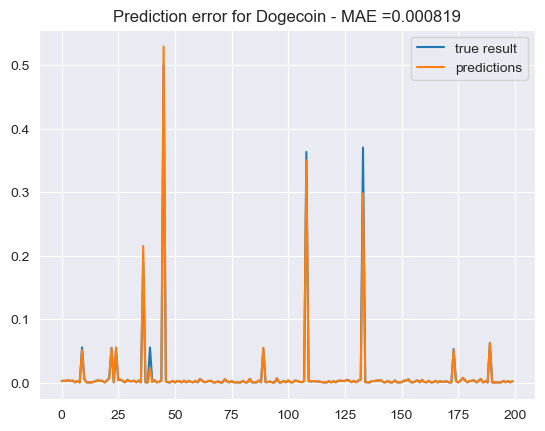

In [15]:
plt.title(f'Prediction error for Dogecoin - MAE ={mean_absolute_error(y_test, predictions):.6f}')
plt.plot(y_test[:200], label="true result")
plt.plot(predictions[:200], label="predictions")
plt.legend()
plt.show()

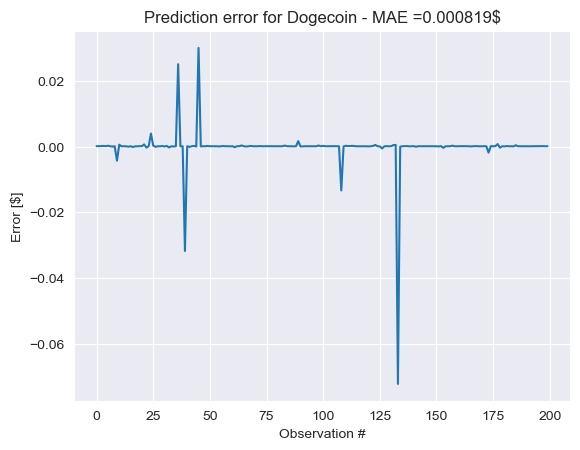

In [16]:
plt.title(f'Prediction error for Dogecoin - MAE ={mean_absolute_error(y_test, predictions):.6f}$')
plt.xlabel("Observation #")
plt.ylabel("Error [$]")
plt.plot(predictions[:200] - y_test[:200])
plt.show()

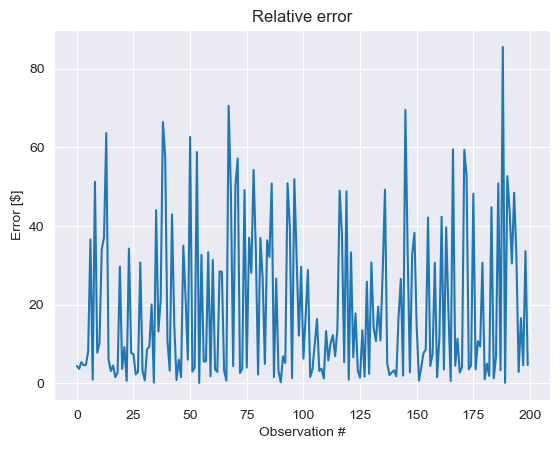

In [17]:
plt.title(f'Relative error')
plt.xlabel("Observation #")
plt.ylabel("Error [$]")
plt.plot(100 * np.abs(predictions[:200] - y_test[:200]) / np.abs(y_test[:200]))
plt.show()

In [9]:

def create_window(df, window_size):   
    windows = []
    for i in range(len(df)-window_size):
        window = df.iloc[i : i + window_size].values.flatten()
        print(window)
        windows.append(window)

df1 = pd.read_csv("dataset.csv").drop(columns=["Unnamed: 0"])
windows1 = create_window(df1, 5)
print(windows1.head(5))


[1.50213004e-04 1.34000000e+02 1.15593000e-04 1.34050003e+02
 2.04608004e-04 1.07720001e+02 3.28302995e-04 9.22818985e+01
 6.61751023e-04 7.90999985e+01]
[1.15593000e-04 1.34050003e+02 2.04608004e-04 1.07720001e+02
 3.28302995e-04 9.22818985e+01 6.61751023e-04 7.90999985e+01
 3.54276010e-04 9.25000000e+01]
[2.04608004e-04 1.07720001e+02 3.28302995e-04 9.22818985e+01
 6.61751023e-04 7.90999985e+01 3.54276010e-04 9.25000000e+01
 2.79653003e-04 1.07142998e+02]
[3.28302995e-04 9.22818985e+01 6.61751023e-04 7.90999985e+01
 3.54276010e-04 9.25000000e+01 2.79653003e-04 1.07142998e+02
 2.93524005e-04 1.06639999e+02]
[6.61751023e-04 7.90999985e+01 3.54276010e-04 9.25000000e+01
 2.79653003e-04 1.07142998e+02 2.93524005e-04 1.06639999e+02
 4.50480991e-04 9.76999969e+01]
[3.54276010e-04 9.25000000e+01 2.79653003e-04 1.07142998e+02
 2.93524005e-04 1.06639999e+02 4.50480991e-04 9.76999969e+01
 5.58298023e-04 1.09599998e+02]
[2.79653003e-04 1.07142998e+02 2.93524005e-04 1.06639999e+02
 4.50480991e-04

AttributeError: 'NoneType' object has no attribute 'head'